In [17]:
from glob import glob
import json
import pandas as pd

files = glob('./output/experiment_different_surrogate_approximation/*.json')

all_dicts = []

for file in files:
    with open(file, "r") as f:
        data = json.load(f)
        all_dicts.append(data)

df = pd.DataFrame(all_dicts)

df

,epochs,training_accuracy,test_accuracy,time,num_hidden_layer,num_hidden_neurons,sparsity,surrogate
0,8,0.932688,71.952297,7804.782513,2,3000,0,spike_rate_escape
1,10,0.955248,70.097173,8937.570395,2,3000,0,atan


In [18]:
from constants import TIME_STEPS
from different_surrogate_approximation_experiment import best_grid_search_model_atan, best_grid_search_model_spike_rate_escape

In [19]:
import torch
import copy

atan_model = copy.deepcopy(best_grid_search_model_atan)
atan_model.load_state_dict(torch.load('./models/experiment_different_surrogate_approximation/atan.pth'))

spike_rate_escape_model = copy.deepcopy(best_grid_search_model_spike_rate_escape)
spike_rate_escape_model.load_state_dict(torch.load('./models/experiment_different_surrogate_approximation/spike_rate_escape.pth'))

<All keys matched successfully>

In [20]:
import torch
from util.utils import get_device
from torch.utils.data import DataLoader
from tonic import datasets, transforms

selection_index = 2
device = get_device()

frame_transform = transforms.ToFrame(
    sensor_size=datasets.SHD.sensor_size,  
    n_time_bins=TIME_STEPS
)

test_data = datasets.SHD("./data", transform=frame_transform, train=False)

test_data_loader = DataLoader(test_data, shuffle=False, batch_size=32)

data, target = list(test_data_loader)[0]
data = data.to_dense().to(torch.float32).squeeze().permute(1, 0, 2).to(device)

x_selected = data[:, selection_index, :]
y_selected = target[selection_index]


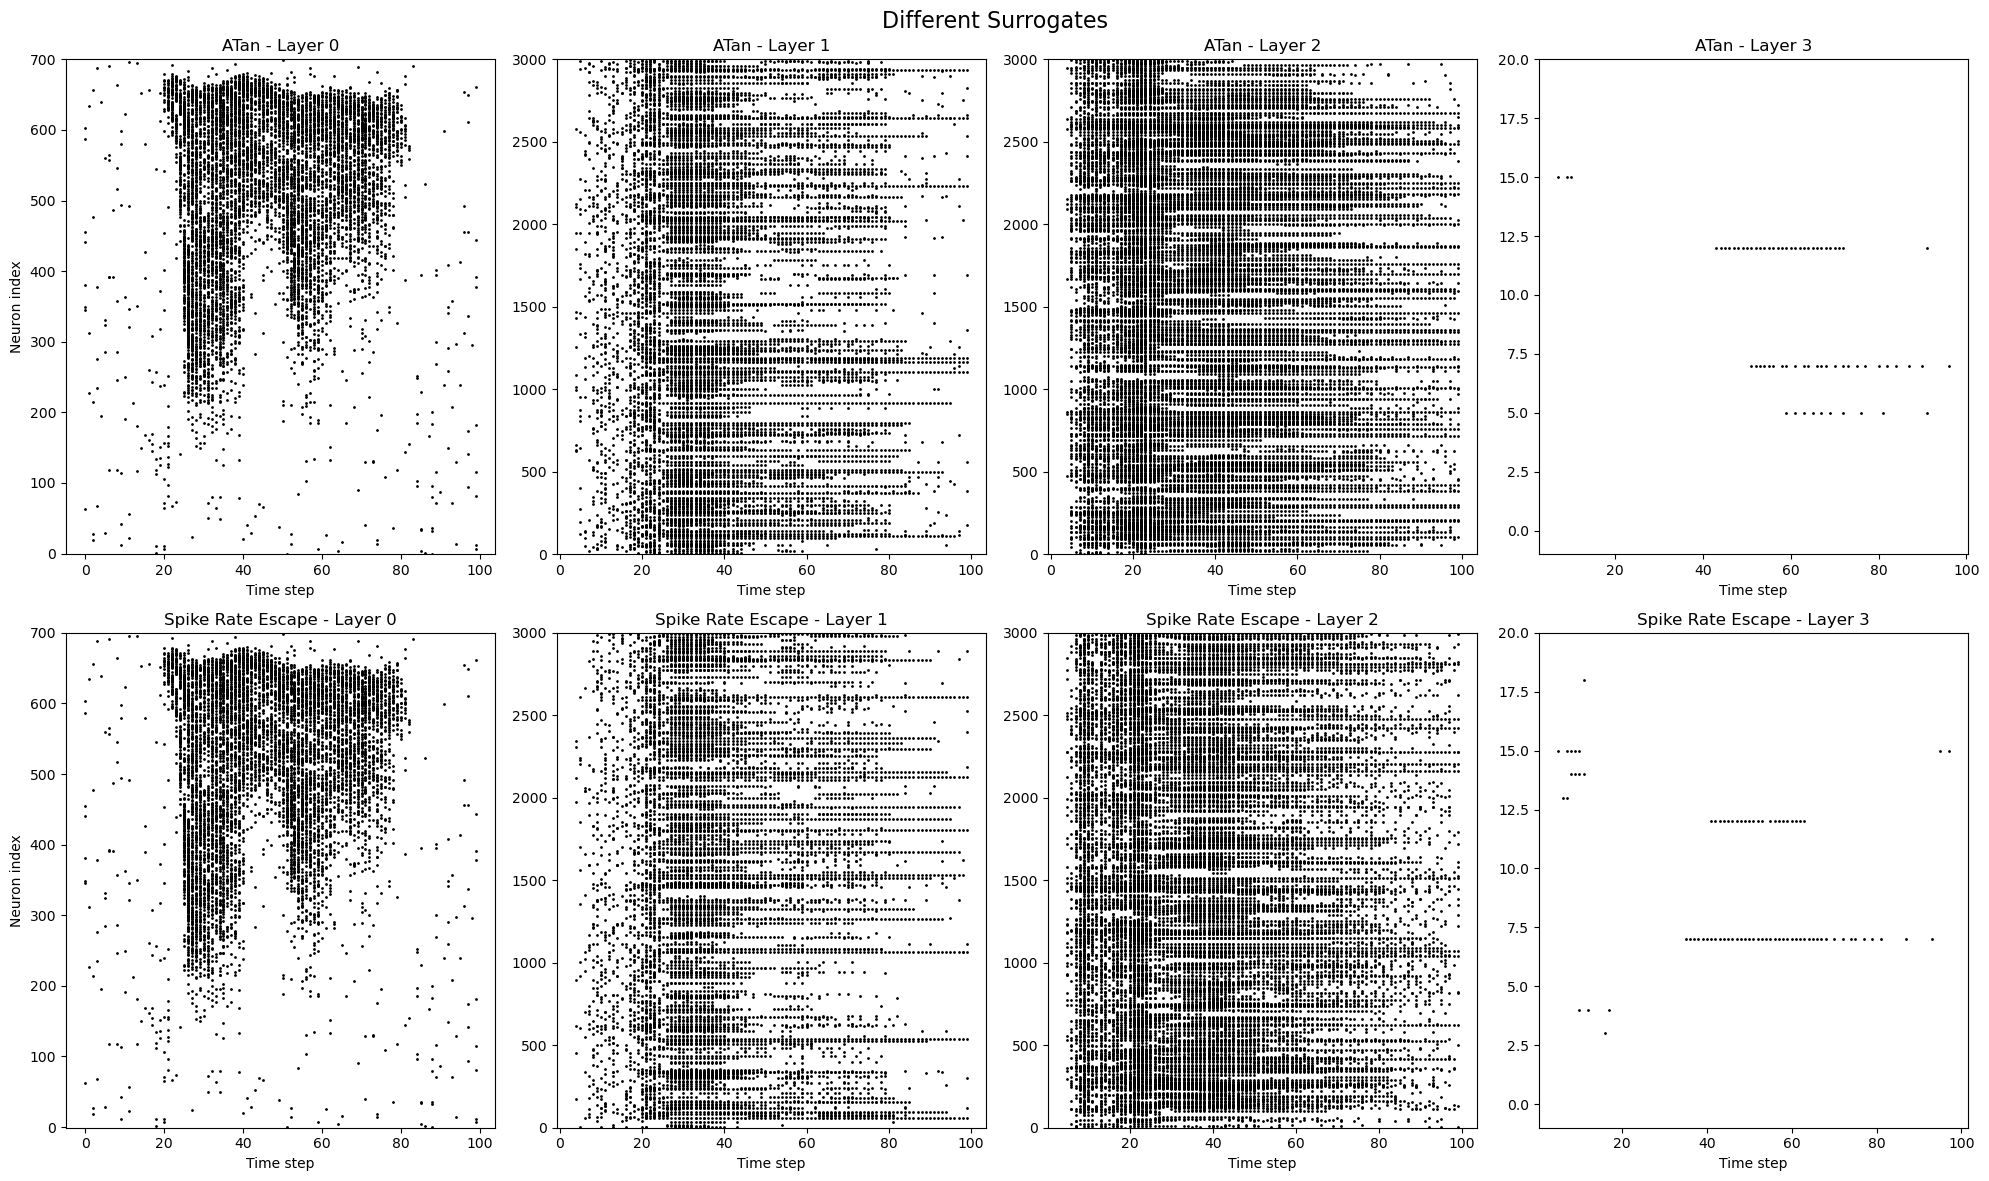

In [21]:
from util.plot_layer_development import plot_layer_development

models = [
    atan_model,
    spike_rate_escape_model
]

plot_layer_development(models, data, selection_index, ["ATan", "Spike Rate Escape"], "Different Surrogates", figsize=(20, 12))